## Starting Over
### New external survey data (University)

#### -------------------------------------------Importing Libraries-----------------------------------------

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [69]:
#read the data
df = pd.read_csv('Social_media_usage_and_mental_health.csv',encoding='utf-8')

#### ----------------------------------------------Learning the Data------------------------------------------------

In [70]:
df.describe()

,1. What is your age?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

#### --------------------------------------------------- Renaming Columns -------------------------------------------------------

In [72]:
column_names = df.columns.tolist()

In [73]:
column_names

['Timestamp',
 '1. What is your age?',
 '2. Gender',
 '3. Relationship Status',
 '4. Occupation Status',
 '5. What type of organizations are you affiliated with?',
 '6. Do you use social media?',
 '7. What social media platforms do you commonly use?',
 '8. What is the average time you spend on social media every day?',
 '9. How often do you find yourself using Social media without a specific purpose?',
 '10. How often do you get distracted by Social media when you are busy doing something?',
 "11. Do you feel restless if you haven't used Social media in a while?",
 '12. On a scale of 1 to 5, how easily distracted are you?',
 '13. On a scale of 1 to 5, how much are you bothered by worries?',
 '14. Do you find it difficult to concentrate on things?',
 '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
 '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
 '17. How often do

In [74]:
new_column_names = [
    'timestamp',
    'age',
    'gender',
    'relationship_status',
    'occupation_status',
    'org_affiliation',
    'use_social_media',
    'platforms_used',
    'avg_social_time',
    'purposeless_use_freq',
    'distracted_by_sm',
    'restless_without_sm',
    'easily_distracted',
    'worry_level',
    'concentration_difficulty',
    'comparison_freq',
    'comparison_feelings',
    'seek_validation',
    'feel_depressed',
    'interest_fluctuation',
    'sleep_issues'
]

df.columns = new_column_names

#### ----------------------------------------------Handling Age Outliers----------------------------------------------------

{'whiskers': [<matplotlib.lines.Line2D at 0x266bd8a0910>,
 'caps': [<matplotlib.lines.Line2D at 0x266bd8a0b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x266bd8a07d0>],
 'medians': [<matplotlib.lines.Line2D at 0x266bd8a0e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x266bd8a0f50>],
 'means': []}

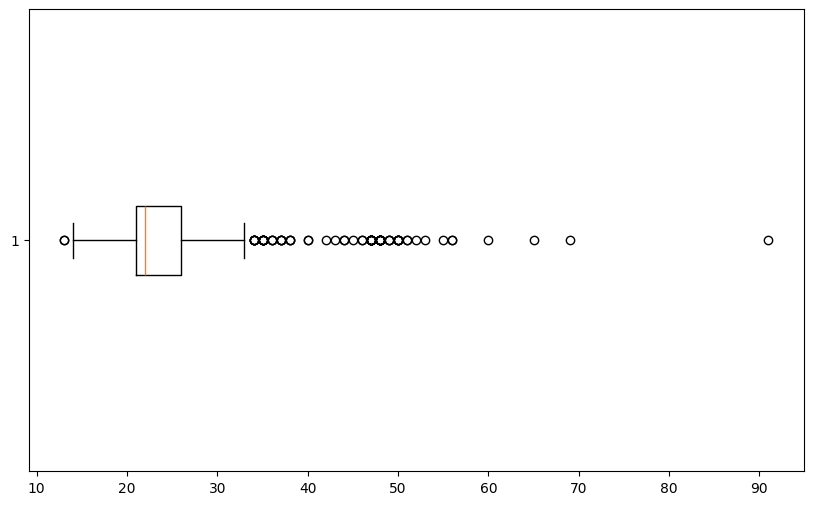

In [75]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['age'], vert=False)

In [76]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x266bd9011d0>,
 'caps': [<matplotlib.lines.Line2D at 0x266bd901450>,
 'boxes': [<matplotlib.lines.Line2D at 0x266bd901090>],
 'medians': [<matplotlib.lines.Line2D at 0x266bd9016d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x266bd901810>],
 'means': []}

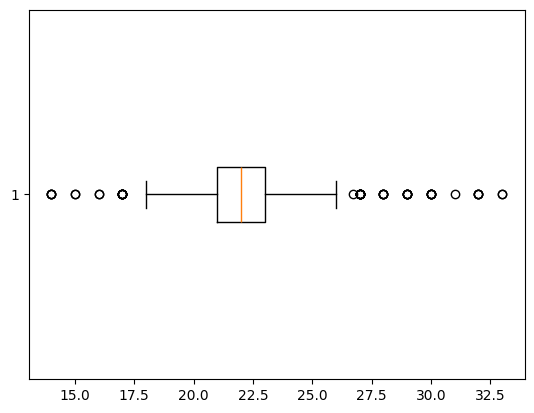

In [77]:
plt.boxplot(df['age'], vert=False)

#### ---------------------------------------Dropping Less Important Columns and Values--------------------------------------

In [78]:
df.drop(['timestamp','org_affiliation','platforms_used'], axis=1 ,  inplace=True)

In [79]:
df['occupation_status'].value_counts()

occupation_status
University Student    290
Salaried Worker        58
School Student         47
Retired                 2
Name: count, dtype: int64

In [80]:
# It seems that the occupation status does not have a lot of variance, so we can drop it
df.drop(['occupation_status'], axis=1 ,  inplace=True)

In [81]:
df['gender'].value_counts()

gender
Female                 232
Male                   159
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [82]:
df = df[df['gender'].isin(['Male', 'Female'])]

#### ------------------------------------------------Exploring Relationships--------------------------------------------------

In [83]:
# Giving the vizualization a separte copy of df
df_viz = df.copy()

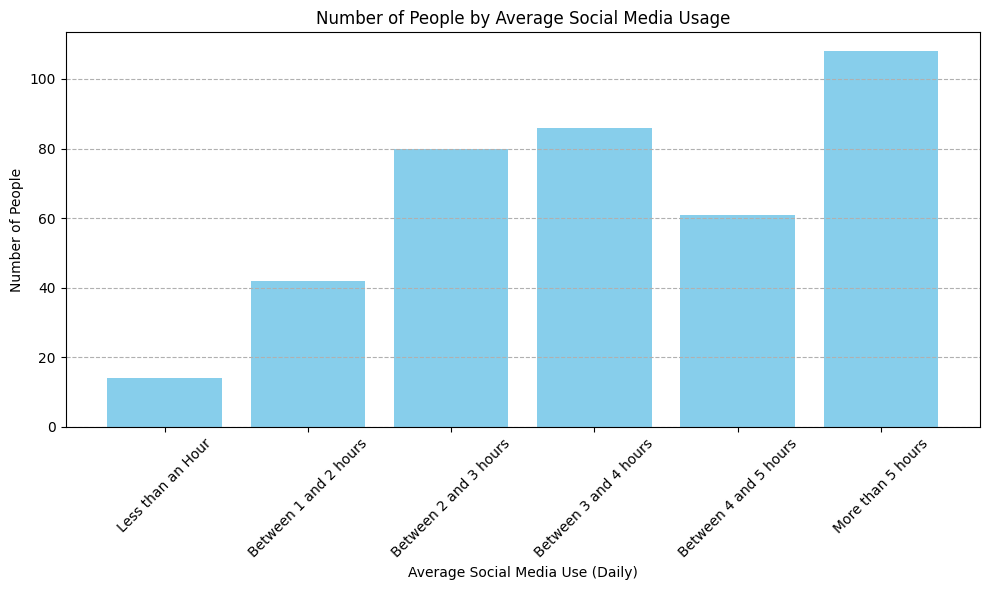

In [84]:
import matplotlib.pyplot as plt

# Define correct category order
time_order = [
    'Less than an Hour',
    'Between 1 and 2 hours',
    'Between 2 and 3 hours',
    'Between 3 and 4 hours',
    'Between 4 and 5 hours',
    'More than 5 hours'
]

# Set category order
df_viz['avg_social_time'] = pd.Categorical(
    df_viz['avg_social_time'],
    categories=time_order,
    ordered=True
)

# Count people in each category
counts = df_viz['avg_social_time'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Average Social Media Use (Daily)')
plt.ylabel('Number of People')
plt.title('Number of People by Average Social Media Usage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

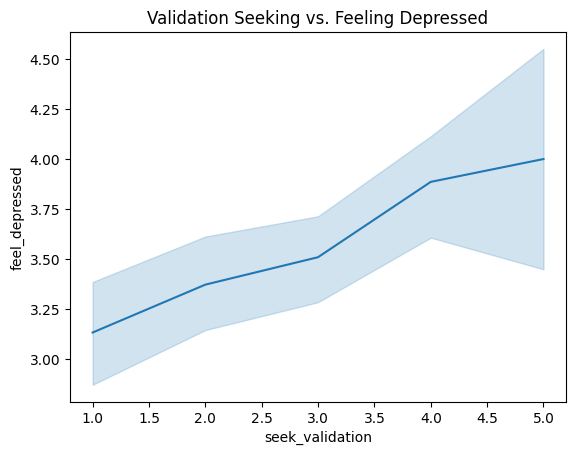

In [85]:
sns.lineplot(x='seek_validation',
             y='feel_depressed',
             data=df_viz)
plt.title('Validation Seeking vs. Feeling Depressed')
plt.show()


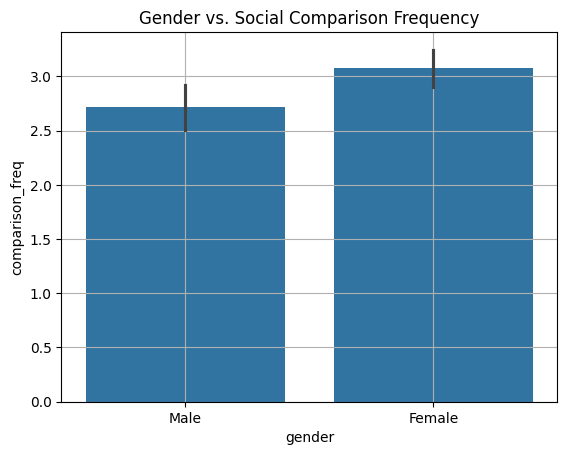

In [86]:
sns.barplot(
    x='gender',
    y='comparison_freq',
    data=df_viz
)
plt.title('Gender vs. Social Comparison Frequency')
plt.grid(True)
plt.show()

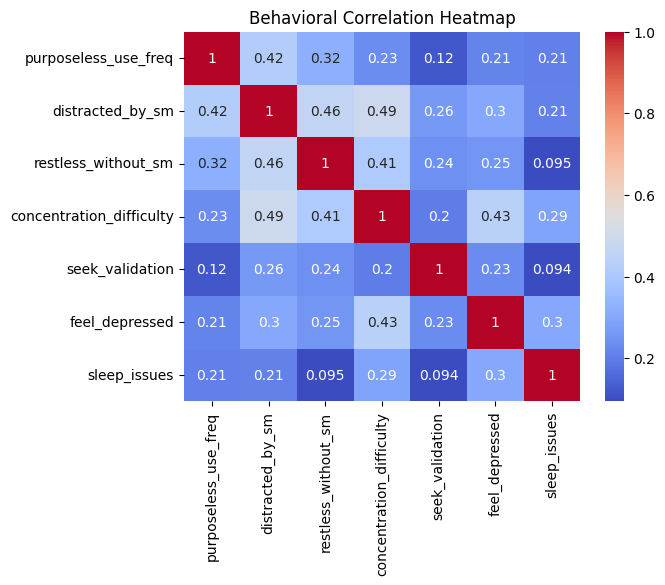

In [87]:
behavior_cols = [
    'purposeless_use_freq', 'distracted_by_sm', 'restless_without_sm',
    'concentration_difficulty', 'seek_validation',
    'feel_depressed', 'sleep_issues'
]

sns.heatmap(df_viz[behavior_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Behavioral Correlation Heatmap')
plt.show()


#### -----------------------------------------Changing All Data to Numerical---------------------------------------------------

In [88]:
df['avg_social_time'].value_counts()

avg_social_time
More than 5 hours        108
Between 3 and 4 hours     86
Between 2 and 3 hours     80
Between 4 and 5 hours     61
Between 1 and 2 hours     42
Less than an Hour         14
Name: count, dtype: int64

In [89]:
hours_mapping = {'Less than an Hour': 1,
                'Between 1 and 2 hours': 2,
                'Between 2 and 3 hours': 3,
                'Between 3 and 4 hours': 4,
                'Between 4 and 5 hours': 5,
                'More than 5 hours': 6}
df['avg_social_time'] = df['avg_social_time'].map(hours_mapping)


In [90]:
df = pd.get_dummies(df, columns=['gender'], drop_first=False)

In [91]:
df = pd.get_dummies(df, columns=['relationship_status'], drop_first=True)

In [92]:
df['use_social_media'] = df['use_social_media'].map({'Yes': 1, 'No': 0})

In [93]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 479
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    391 non-null    float64
 1   use_social_media                       391 non-null    int64  
 2   avg_social_time                        391 non-null    int64  
 3   purposeless_use_freq                   391 non-null    int64  
 4   distracted_by_sm                       391 non-null    int64  
 5   restless_without_sm                    391 non-null    int64  
 6   easily_distracted                      391 non-null    int64  
 7   worry_level                            391 non-null    int64  
 8   concentration_difficulty               391 non-null    int64  
 9   comparison_freq                        391 non-null    int64  
 10  comparison_feelings                    391 non-null    int64  
 11  seek_valida

#### --------------------------------------------------Scalling---------------------------------------------------

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 479
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    391 non-null    float64
 1   use_social_media                       391 non-null    int64  
 2   avg_social_time                        391 non-null    int64  
 3   purposeless_use_freq                   391 non-null    int64  
 4   distracted_by_sm                       391 non-null    int64  
 5   restless_without_sm                    391 non-null    int64  
 6   easily_distracted                      391 non-null    int64  
 7   worry_level                            391 non-null    int64  
 8   concentration_difficulty               391 non-null    int64  
 9   comparison_freq                        391 non-null    int64  
 10  comparison_feelings                    391 non-null    int64  
 11  seek_valida

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = df.select_dtypes(include=['int64', 'int32' , 'float64']).columns.tolist()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### --------------------------------------------Saving Preproccessed Data--------------------------------------------------

In [97]:
df.to_csv('cleaned_ext_survey_data.csv', index=False)

#### ---------------------------------------Exploring Realtionships Between Features---------------------------------------

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 479
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    391 non-null    float64
 1   use_social_media                       391 non-null    float64
 2   avg_social_time                        391 non-null    float64
 3   purposeless_use_freq                   391 non-null    float64
 4   distracted_by_sm                       391 non-null    float64
 5   restless_without_sm                    391 non-null    float64
 6   easily_distracted                      391 non-null    float64
 7   worry_level                            391 non-null    float64
 8   concentration_difficulty               391 non-null    float64
 9   comparison_freq                        391 non-null    float64
 10  comparison_feelings                    391 non-null    float64
 11  seek_valida

<Axes: >

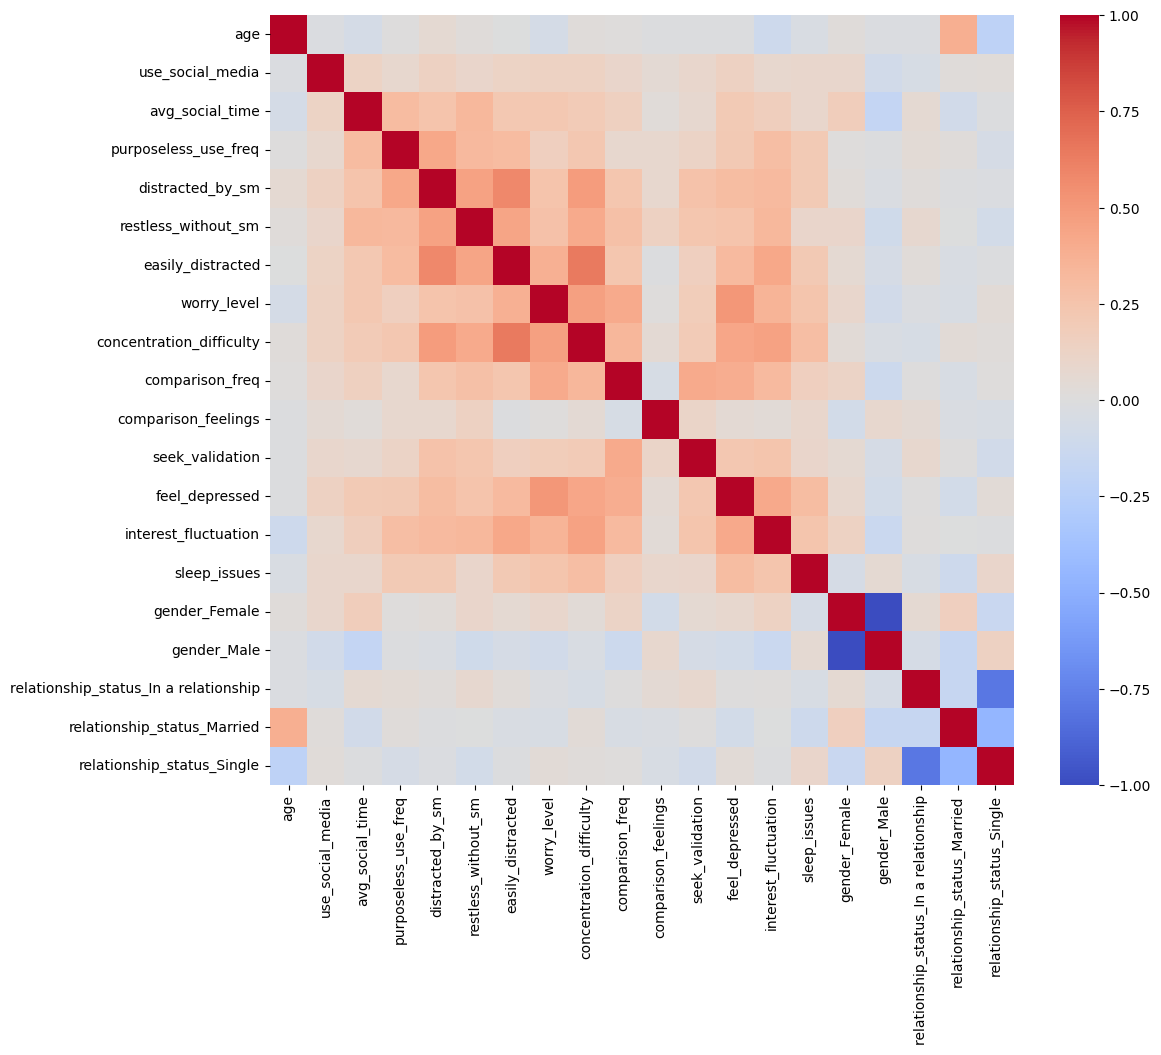

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

##### *Since we have no label column to do classification, we will try using clustering on the data first to make a "is_addicted" column.*

#### ------------------------------------------------------Clustering----------------------------------------------------------

In [100]:
features_for_clustering = [
    'avg_social_time',
    'purposeless_use_freq',
    'distracted_by_sm',
    'concentration_difficulty',
    'restless_without_sm'
]

In [101]:
from sklearn.cluster import KMeans

X_cluster = df[features_for_clustering]
kmeans = KMeans(n_clusters=2, random_state=42)
df['is_addicted'] = kmeans.fit_predict(X_cluster)

#### ----------------------------------------------Evaluate the Clustering-------------------------------------------------

In [102]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_cluster, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.28032268329627763


##### Note 1: *Even though this is not the best silhouette score generally, it is very good in the field of behavioral analysis. This is even more explainable by the fact that addiction is more of a spectrum, not a distinct feature.*

In [103]:
# Cluster Centers
df.groupby('is_addicted')[features_for_clustering].mean()

,avg_social_time,purposeless_use_freq,distracted_by_sm,concentration_difficulty,restless_without_sm
is_addicted,,,,,
0,0.431307,0.470903,0.591327,0.579515,0.565236
1,-0.500411,-0.546351,-0.686070,-0.672365,-0.655798


##### Note 2: *The cluster center profiles show that there's clear distinction between both clusters. It also shows that the 1 value means not addicted and vise versa.*

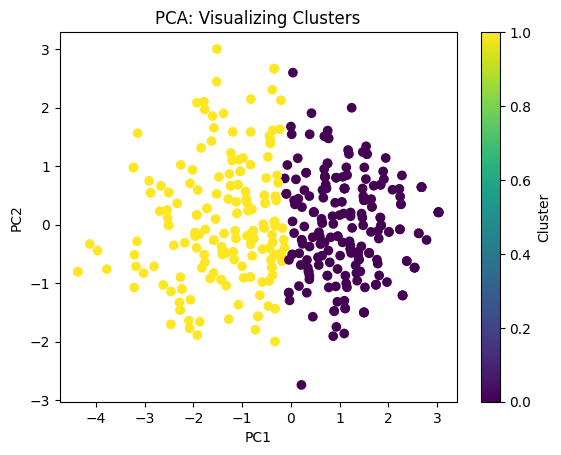

In [104]:
# PCA for Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_cluster)

plt.scatter(reduced[:, 0], reduced[:, 1], c=df['is_addicted'], cmap='viridis')
plt.title('PCA: Visualizing Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

##### Note 3: *The PCA plot shows that our data clusters are balanced and nicely distributed, further showing that human related data is always a spectrum*

#### -------------------------------------------------Save After Clustering--------------------------------------------------------

In [105]:
df.to_csv('clustered_ext_survey_data.csv', index=False)

#### ----------------------------------------Checking Which Clusters Indicate Addiction------------------------------------------

<Axes: >

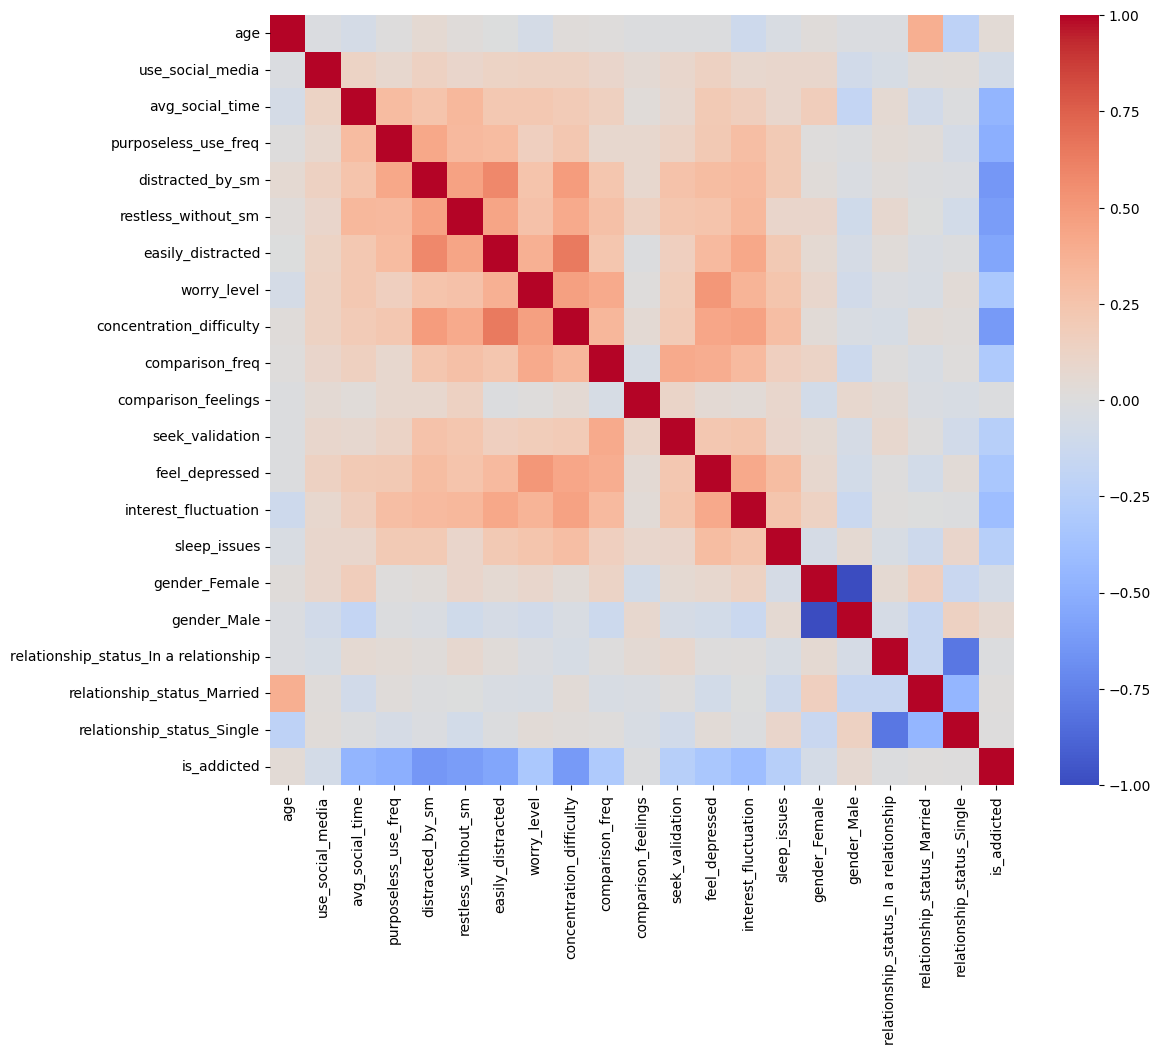

In [106]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

##### It seems that it classified the not addicted as 1 and the addicted as 0, so let's fix that.

In [107]:
df['is_addicted'] = 1 - df['is_addicted']

<Axes: >

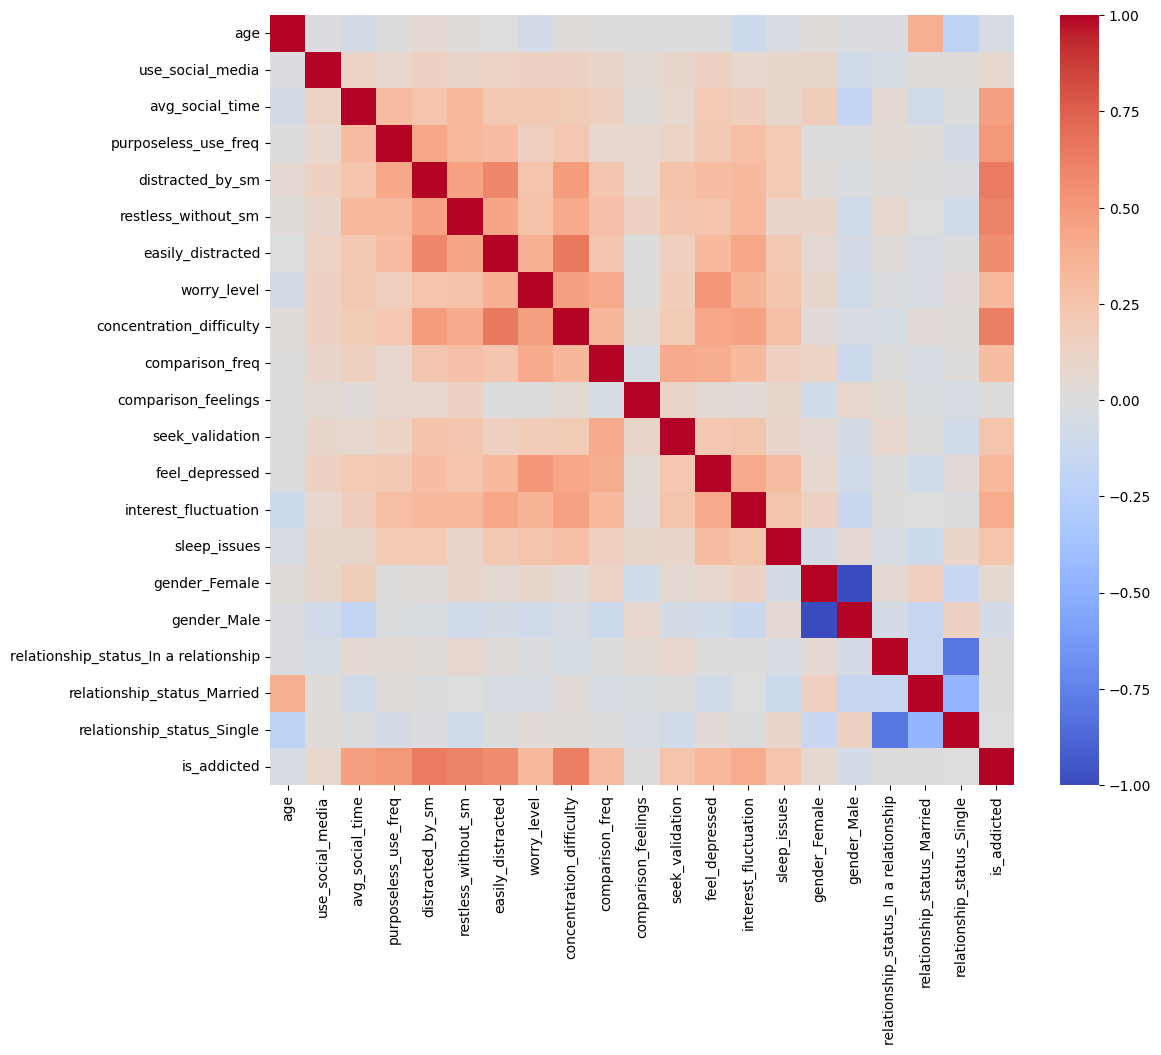

In [108]:
# Now let's recheck the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

#### --------------------------------------------------Classification-------------------------------------------------------

In [109]:
from sklearn.model_selection import train_test_split

X = df.drop('is_addicted', axis=1)
y = df['is_addicted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
log_preds = log_reg.predict(X_test)

# Evaluate predictions
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Precision:", precision_score(y_test, log_preds))
print("Recall:", recall_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))

🔹 Logistic Regression
Accuracy: 0.9746835443037974
Precision: 1.0
Recall: 0.9487179487179487
F1 Score: 0.9736842105263158
Confusion Matrix:
 [[40  0]
 [ 2 37]]


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Evaluate predictions
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

🔹 Random Forest
Accuracy: 0.8860759493670886
Precision: 0.8947368421052632
Recall: 0.8717948717948718
F1 Score: 0.8831168831168831
Confusion Matrix:
 [[36  4]
 [ 5 34]]


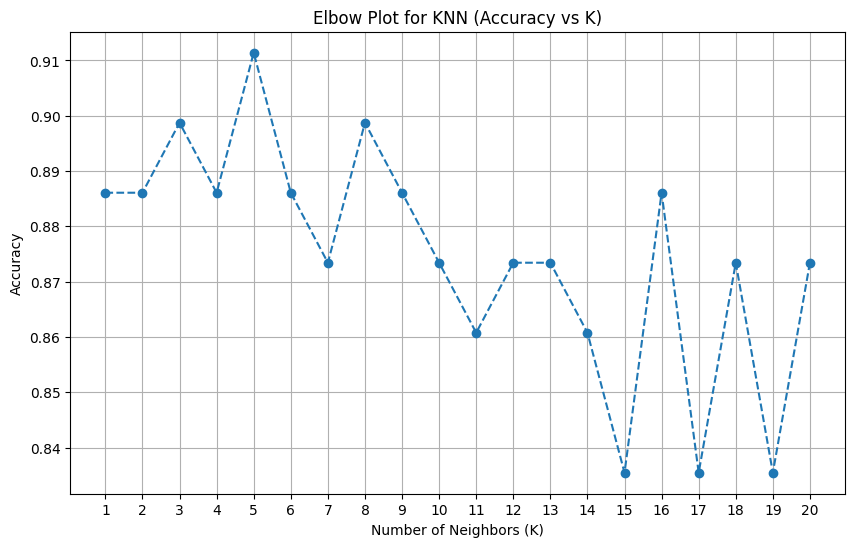

🔹 KNN (K=5)
Accuracy: 0.9113924050632911
Precision: 0.8809523809523809
Recall: 0.9487179487179487
F1 Score: 0.9135802469135802
Confusion Matrix:
 [[35  5]
 [ 2 37]]


In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Elbow method to determine the best K
k_range = range(1, 21)
knn_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    score = accuracy_score(y_test, preds)
    knn_scores.append(score)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, knn_scores, marker='o', linestyle='--')
plt.title('Elbow Plot for KNN (Accuracy vs K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# KNN with K=5 (as originally used)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
knn_preds = knn.predict(X_test)

print("🔹 KNN (K=5)")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Precision:", precision_score(y_test, knn_preds))
print("Recall:", recall_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

In [113]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb.predict(X_test)

# Evaluate predictions
print("🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

🔹 XGBoost
Accuracy: 0.9240506329113924
Precision: 0.9459459459459459
Recall: 0.8974358974358975
F1 Score: 0.9210526315789473
Confusion Matrix:
 [[38  2]
 [ 4 35]]


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### ------------------------------------------Saving Models and Scaler--------------------------------------------------

In [114]:
import joblib
joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(rf, "rf_model.pkl")
joblib.dump(xgb, "xgb_class_model.pkl")

['xgb_class_model.pkl']

#### ---------------------------------------Testing the integrity of this method-------------------------------------------

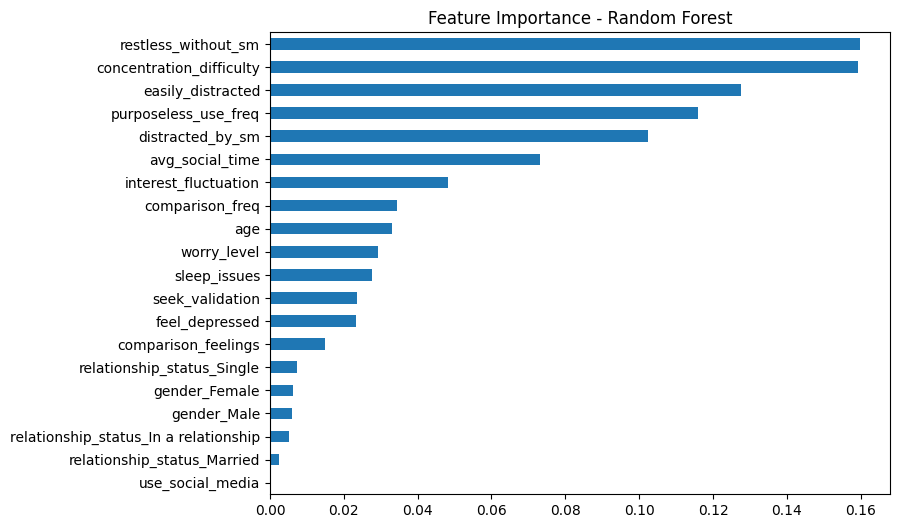

In [115]:
# Feature Importance - Random Forest
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance - Random Forest")
plt.show()

##### *Even though the features we used for the clustering occupy 5 of the top 6 places in feature importance, some features like 'easily_distracted' is very important while not being one of the clustering features. Additionally, we picked the 5 features we used for clustering based on which features indicate addiction the most. So it only makes sense that they show up here.*

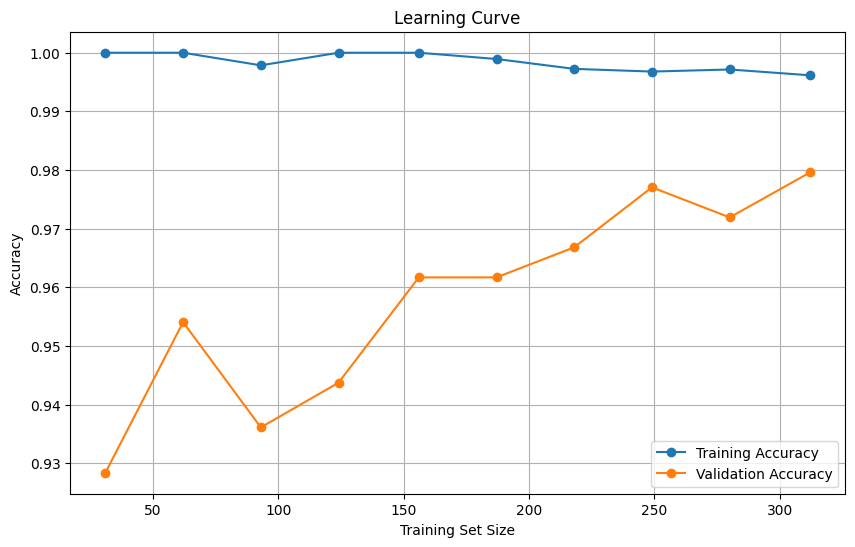

In [116]:
# Testing for overfitting

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use your existing model, e.g., logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model,
    X,          # your full feature set
    y,                 # your labels
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # vary training size
    random_state=42
)

# Average across folds
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


##### *It seems like both the validation and the training did really well, but maybe too early. This doesn't indicate overfitting, but rather lack of variance in the data. While this is not great, it is expected since this dataset is only about 400 rows collected from the same university.*

In [117]:
# Training on only the features used for clustering
from sklearn.model_selection import train_test_split

X = df[features_for_clustering]
y = df['is_addicted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
log_preds = log_reg.predict(X_test)

# Evaluate predictions
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Precision:", precision_score(y_test, log_preds))
print("Recall:", recall_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))

🔹 Logistic Regression
Accuracy: 0.9746835443037974
Precision: 1.0
Recall: 0.9487179487179487
F1 Score: 0.9736842105263158
Confusion Matrix:
 [[40  0]
 [ 2 37]]


In [119]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Evaluate predictions
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

🔹 Random Forest
Accuracy: 0.9367088607594937
Precision: 0.9722222222222222
Recall: 0.8974358974358975
F1 Score: 0.9333333333333333
Confusion Matrix:
 [[39  1]
 [ 4 35]]


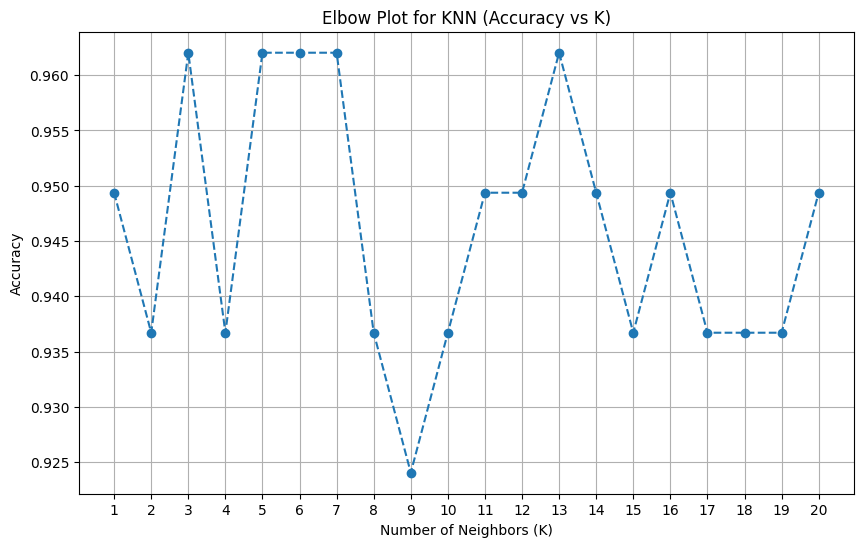

🔹 KNN (K=5)
Accuracy: 0.9620253164556962
Precision: 1.0
Recall: 0.9230769230769231
F1 Score: 0.96
Confusion Matrix:
 [[40  0]
 [ 3 36]]


In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Elbow method to determine the best K
k_range = range(1, 21)
knn_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    score = accuracy_score(y_test, preds)
    knn_scores.append(score)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, knn_scores, marker='o', linestyle='--')
plt.title('Elbow Plot for KNN (Accuracy vs K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# KNN with K=5 (as originally used)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
knn_preds = knn.predict(X_test)

print("🔹 KNN (K=5)")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Precision:", precision_score(y_test, knn_preds))
print("Recall:", recall_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

In [121]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb.predict(X_test)

# Evaluate predictions
print("🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

🔹 XGBoost
Accuracy: 0.9240506329113924
Precision: 0.9459459459459459
Recall: 0.8974358974358975
F1 Score: 0.9210526315789473
Confusion Matrix:
 [[38  2]
 [ 4 35]]


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


##### *Since the predictions did improve by a very small margain (possibly due to overfitting), I believe that this indicates that our full model is not overfitted.*

In [122]:
# Training on all features except 'restless_without_sm' to check if cluster features heavily influences the model
from sklearn.model_selection import train_test_split

X = df.drop('is_addicted', axis=1)
X = X.drop('restless_without_sm', axis=1)
y = df['is_addicted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
log_preds = log_reg.predict(X_test)

# Evaluate predictions
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Precision:", precision_score(y_test, log_preds))
print("Recall:", recall_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))

🔹 Logistic Regression
Accuracy: 0.9367088607594937
Precision: 0.925
Recall: 0.9487179487179487
F1 Score: 0.9367088607594937
Confusion Matrix:
 [[37  3]
 [ 2 37]]


In [124]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Evaluate predictions
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

🔹 Random Forest
Accuracy: 0.9113924050632911
Precision: 0.9
Recall: 0.9230769230769231
F1 Score: 0.9113924050632911
Confusion Matrix:
 [[36  4]
 [ 3 36]]


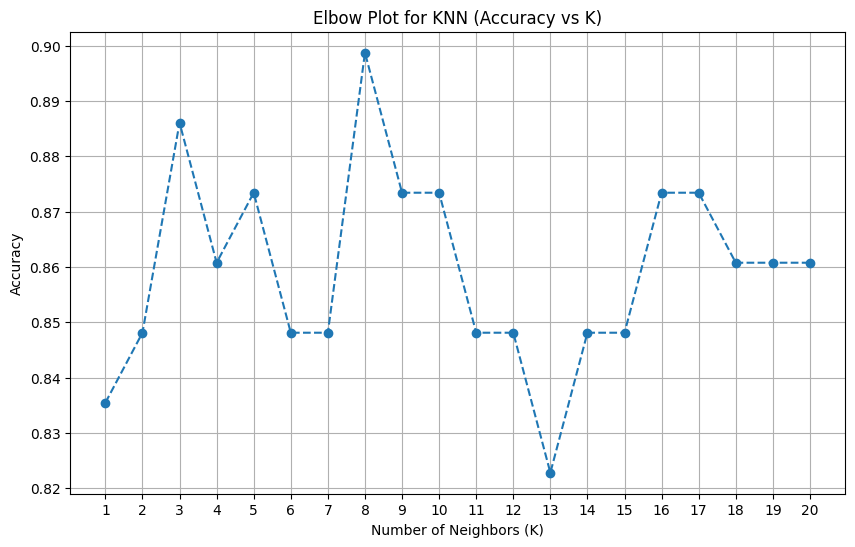

🔹 KNN (K=5)
Accuracy: 0.8734177215189873
Precision: 0.8536585365853658
Recall: 0.8974358974358975
F1 Score: 0.875
Confusion Matrix:
 [[34  6]
 [ 4 35]]


In [125]:
from sklearn.neighbors import KNeighborsClassifier

# Elbow method to determine the best K
k_range = range(1, 21)
knn_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    score = accuracy_score(y_test, preds)
    knn_scores.append(score)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, knn_scores, marker='o', linestyle='--')
plt.title('Elbow Plot for KNN (Accuracy vs K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# KNN with K=5 (as originally used)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
knn_preds = knn.predict(X_test)

print("🔹 KNN (K=5)")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Precision:", precision_score(y_test, knn_preds))
print("Recall:", recall_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

In [126]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb.predict(X_test)

# Evaluate predictions
print("🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Precision:", precision_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

🔹 XGBoost
Accuracy: 0.9240506329113924
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1 Score: 0.9230769230769231
Confusion Matrix:
 [[37  3]
 [ 3 36]]


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


##### *Since the accuracy of all models didn't take a big hit when we excluded one of the clustering features from the training, then the model is not heavily dependent on these features.*

##### *Additional note: Since the idea of the clustering was to classify each individual as addicted or not_addicted anyways, I don't think that there's a problem with the training model "learning" the clustering method. Although this may seem like overfitting, it's really just the model doing exactly what I want it to do, which is classify the individuals based on their addiction. The only caveat here is whether the clustering technique actually divide the data into a correct addicted and not_addicted split or not. Luckily, we have already confirmed that.*

#### --------------------------------------------Testing on a Real Case--------------------------------------------

In [127]:
from sklearn.model_selection import train_test_split

X = df.drop('is_addicted', axis=1)
y = df['is_addicted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
import numpy as np

# Example values: Mohamed Ayman
new_data = np.array([[ 
    21,   # age
    1,    # use_social_media
    5,    # avg_social_time
    5,    # purposeless_use_freq
    5,    # distracted_by_sm
    4,    # restless_without_sm
    3,    # easily_distracted
    3,    # worry_level
    2,    # concentration_difficulty
    1,    # comparison_freq
    2,    # comparison_feelings
    4,    # seek_validation
    4,    # feel_depressed
    5,    # interest_fluctuation
    3,    # sleep_issues
    0,    # gender_Female
    1,    # gender_Male
    0,    # relationship_status_In a relationship
    0,    # relationship_status_Married
    1     # relationship_status_Single
]])


In [129]:
new_data_scaled = scaler.transform(new_data)
print("Scaled New Data:", new_data_scaled)

# Saving the scaler for later use
joblib.dump(scaler, "scaler_class.pkl")

Scaled New Data: [[-0.40429527  0.07170347  0.55373931  1.27753483  1.18888291  1.05567818
  -0.43210679 -0.63618583 -1.13787402 -1.35576639 -0.71490964  1.19419094
   0.42545785  1.37071187 -0.24132088 -1.20794019  1.20794019 -0.53100585
  -0.30360957  0.66543552]]


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


['scaler_class.pkl']

In [130]:
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(new_data_scaled)
knn.fit(X_train, y_train)
knn_pred = knn.predict(new_data_scaled)
rf.fit(X_train, y_train)
rf_pred = rf.predict(new_data)  # Random Forest doesn't need scaled data
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(new_data_scaled)

print("Logistic Regression prediction:", log_pred[0])
print("KNN prediction:", knn_pred[0])
print("Random Forest prediction:", rf_pred[0])
print("XGBoost prediction:", xgb_pred[0])

c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression prediction: 1
KNN prediction: 1
Random Forest prediction: 1
XGBoost prediction: 1


In [131]:
import numpy as np

# Example values: Fares Gamil
new_data = np.array([[ 
    20,   # age
    1,    # use_social_media
    1,    # avg_social_time
    3,    # purposeless_use_freq
    2,    # distracted_by_sm
    1,    # restless_without_sm
    5,    # easily_distracted
    3,    # worry_level
    5,    # concentration_difficulty
    1,    # comparison_freq
    5,    # comparison_feelings
    4,    # seek_validation
    1,    # feel_depressed
    2,    # interest_fluctuation
    3,    # sleep_issues
    0,    # gender_Female
    1,    # gender_Male
    0,    # relationship_status_In a relationship
    0,    # relationship_status_Married
    1     # relationship_status_Single
]])


In [132]:
new_data_scaled = scaler.transform(new_data)
print("Scaled New Data:", new_data_scaled)

Scaled New Data: [[-0.72976253  0.07170347 -2.15266156 -0.64738278 -1.17879053 -1.33950655
   1.33704248 -0.63618583  1.22447329 -1.35576639  2.10862236  1.19419094
  -1.98546996 -1.09153166 -0.24132088 -1.20794019  1.20794019 -0.53100585
  -0.30360957  0.66543552]]


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [133]:
log_pred = log_reg.predict(new_data_scaled)
knn_pred = knn.predict(new_data_scaled)
rf_pred = rf.predict(new_data_scaled)
xgb_pred = xgb.predict(new_data_scaled)

print("Logistic Regression prediction:", log_pred[0])
print("KNN prediction:", knn_pred[0])
print("Random Forest prediction:", rf_pred[0])
print("XGBoost prediction:", xgb_pred[0])

Logistic Regression prediction: 0
KNN prediction: 0
Random Forest prediction: 0
XGBoost prediction: 0


c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##### The model seems to do well predicting real data.

## ------------------------------ COMPLETE -------------------------------------

### Dashboard

In [172]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load dataset
data = pd.read_csv('vizData.csv')

# Rename columns for consistency
data.rename(columns={
    'age': 'age',
    'gender': 'gender',
    'avg_social_time': 'avg_daily_social_media_time',
    'concentration_difficulty': 'difficulty_concentrating',
    'feel_depressed': 'feeling_depressed',
    'comparison_freq': 'comparison_frequency'
}, inplace=True)

# Create difficulty status
data['difficulty_status'] = data['difficulty_concentrating'].apply(lambda x: 'Difficult' if x >= 4 else 'Not Difficult')

color_map = {
    'Not Difficult': '#2874A6',
    'Difficult': '#E74C3C'
}

app = dash.Dash(__name__)

time_order = [
    'Less than an Hour',
    'Between 1 and 2 hours',
    'Between 2 and 3 hours',
    'Between 3 and 4 hours',
    'Between 4 and 5 hours',
    'More than 5 hours'
]

app.layout = html.Div([
    html.H2("Social Media Usage and Mental Health Dashboard",
            style={'textAlign': 'center', 'gridColumn': '1 / -1'}),

    html.Div([
        html.Div([
            html.H4("Difficulty Concentrating by Age"),
            dcc.Dropdown(
                id='age-dropdown',
                options=[{'label': str(int(age)), 'value': age} for age in sorted(data['age'].dropna().unique())],
                value=data['age'].dropna().mode()[0]
            ),
            dcc.Graph(id='difficulty-by-age-bar')
        ], style={'padding': '10px'}),

        html.Div([
            html.H4("Difficulty Concentrating by Gender"),
            dcc.Graph(id='difficulty-by-gender-bar')
        ], style={'padding': '10px'}),

        html.Div([
            html.H4("Feeling Depressed by Difficulty Status"),
            dcc.Graph(id='box-depressed')
        ], style={'padding': '10px'}),

        html.Div([
            html.H4("Comparison Frequency Distribution"),
            dcc.Dropdown(
                id='time-dropdown',
                options=[{'label': t, 'value': t} for t in time_order],
                value='Between 2 and 3 hours'
            ),
            dcc.Graph(id='histogram-comparison-freq')
        ], style={'padding': '10px'}),

        html.Div([
            html.H4("Average Worry Level by Social Media Usage Time"),
            dcc.Graph(id='avg-worry-by-social-time-bar')
        ], style={'padding': '10px'}),

        html.Div([
            html.H4("Distribution of Sleep Issues by Difficulty Concentrating"),
            dcc.Graph(id='sleep-issues-by-difficulty-box')
        ], style={'padding': '10px'}),

    ], style={
        'display': 'grid',
        'gridTemplateColumns': '50% 50%',
        'gridGap': '20px',
        'height': '95vh',
        'overflow': 'auto',
        'padding': '10px'
    }),

], style={
    'backgroundColor': '#F2F3F4',
    'color': '#1C1C1C',
    'fontFamily': 'Cairo, sans-serif',
    'padding': '10px'
})

@app.callback(
    Output('difficulty-by-age-bar', 'figure'),
    Input('age-dropdown', 'value')
)
def update_difficulty_by_age(selected_age):
    df_age = data[data['age'] == selected_age]
    counts = df_age['difficulty_status'].value_counts(normalize=True).reset_index()
    counts.columns = ['difficulty_status', 'percentage']
    fig = px.bar(counts, x='difficulty_status', y='percentage',
                 color='difficulty_status', color_discrete_map=color_map,
                 labels={'difficulty_status': 'Difficulty Status', 'percentage': 'Percentage'},
                 title=f'Difficulty Concentrating Distribution for Age {int(selected_age)}')
    fig.update_layout(yaxis=dict(showticklabels=False, showgrid=False))
    return fig

@app.callback(
    Output('difficulty-by-gender-bar', 'figure'),
    Input('age-dropdown', 'value')
)
def update_difficulty_by_gender(_):
    valid_genders = ['Male', 'Female']
    filtered = data[data['gender'].isin(valid_genders)]
    counts = filtered.groupby(['gender', 'difficulty_status']).size().reset_index(name='count')
    total_per_gender = counts.groupby('gender')['count'].transform('sum')
    counts['percentage'] = counts['count'] / total_per_gender * 100
    fig = px.bar(counts, x='gender', y='percentage', color='difficulty_status',
                 barmode='stack', category_orders={'difficulty_status': ['Not Difficult', 'Difficult']},
                 color_discrete_map=color_map,
                 labels={'gender': 'Gender', 'percentage': 'Percentage', 'difficulty_status': 'Difficulty Status'},
                 title='Difficulty Concentrating Percentage by Gender')
    fig.update_layout(yaxis=dict(ticksuffix='%', range=[0, 100]), legend=dict(title='Difficulty Status'))
    return fig

@app.callback(
    Output('box-depressed', 'figure'),
    Input('age-dropdown', 'value')
)
def update_box_depressed(_):
    fig = px.box(data, x='difficulty_status', y='feeling_depressed',
                 color='difficulty_status', color_discrete_map=color_map,
                 labels={'difficulty_status': 'Difficulty Status', 'feeling_depressed': 'Feeling Depressed (1-5)'},
                 title='Feeling Depressed Scores by Difficulty Status')
    return fig

@app.callback(
    Output('histogram-comparison-freq', 'figure'),
    Input('time-dropdown', 'value')
)
def update_comparison_freq_simple_bar(selected_time):
    filtered = data[data['avg_daily_social_media_time'] == selected_time]
    counts = filtered['comparison_frequency'].value_counts().reset_index()
    counts.columns = ['comparison_frequency', 'count']
    counts = counts.sort_values('comparison_frequency')
    fig = px.bar(counts, x='comparison_frequency', y='count',
                 labels={'comparison_frequency': 'Comparison Frequency (1-5)', 'count': 'Count'},
                 title=f'Comparison Frequency Distribution for Social Media Usage: {selected_time}')
    fig.update_layout(title=dict(text=fig.layout.title.text, x=0.5, xanchor='center',
                                automargin=True, font=dict(size=16), pad=dict(t=20, b=20)))
    return fig

@app.callback(
    Output('avg-worry-by-social-time-bar', 'figure'),
    Input('age-dropdown', 'value')
)
def update_avg_worry_by_social_time(_):
    avg_worry = data.groupby('avg_daily_social_media_time')['worry_level'].mean().reset_index()
    avg_worry['avg_daily_social_media_time'] = pd.Categorical(avg_worry['avg_daily_social_media_time'], categories=time_order, ordered=True)
    avg_worry = avg_worry.sort_values('avg_daily_social_media_time')
    fig = px.bar(avg_worry, x='avg_daily_social_media_time', y='worry_level',
                 labels={'avg_daily_social_media_time': 'Average Daily Social Media Time', 'worry_level': 'Average Worry Level'},
                 title='Average Worry Level by Social Media Usage Time')
    fig.update_layout(xaxis_tickangle=-45)
    return fig

@app.callback(
    Output('sleep-issues-by-difficulty-box', 'figure'),
    Input('age-dropdown', 'value')
)
def update_sleep_issues_by_difficulty(_):
    fig = px.box(data, x='difficulty_status', y='sleep_issues',
                 color='difficulty_status', color_discrete_map=color_map,
                 labels={'difficulty_status': 'Difficulty Status', 'sleep_issues': 'Sleep Issues'},
                 title='Distribution of Sleep Issues by Difficulty Concentrating')
    return fig

def find_available_port(start_port=8050):
    import socket
    port = start_port
    while True:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            try:
                s.bind(('127.0.0.1', port))
                return port
            except OSError:
                port += 1

if __name__ == '__main__':
    port = find_available_port(8050)
    print(f"Starting Dash app on http://127.0.0.1:{port}")
    app.run(debug=True, port=port, host='127.0.0.1')


Starting Dash app on http://127.0.0.1:8071
